<a href="https://colab.research.google.com/github/artemmiyy/psu_quants/blob/investing/Research_Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as plt
yf.pdr_override()

Various functions to load, manipulate, and perform EDA on stock data from Yahoo Finance can be found below

In [ ]:
# loads US stock price data into a pandas dataframe
# default interval is 1 day for price and period
# Example query: load_us_stock_data('AAPL', datetime(2000, 12, 16), datetime(2012, 12, 16))

def load_us_stock_data(ticker, start_date, end_date):
  stocks_data = pd.DataFrame()
  stocks_data = pdr.get_data_yahoo(ticker, start = start_date, end = end_date)
  return stocks_data

In [ ]:
# takes a dataframe with stock price data and a datetime startdate
# Example query: us_avg_stock_return('AAPL', datetime(2000, 12, 16), datetime(2012, 12, 16))

def us_stock_avg_return(ticker, start_date, end_date):
  stock_df = load_us_stock_data(ticker, start_date, end_date)
  daily_returns = (stock_df / stock_df.shift(1)) - 1
  avg_annual_stock_return = daily_returns.mean() * 250
  return avg_annual_stock_return

In [ ]:
# plots a daily return of a US stock. 
# Example query: plot_daily_return('AAPL', datetime(2000, 12, 16), datetime(2012, 12, 16))

def plot_daily_return(ticker, start_date, end_date):
  stock_df = load_us_stock_data(ticker, start_date, end_date)
  daily_returns = (stock_df / stock_df.shift(1)) - 1
  daily_returns.plot(figsize = (12,6))

<Axes: xlabel='Date'>

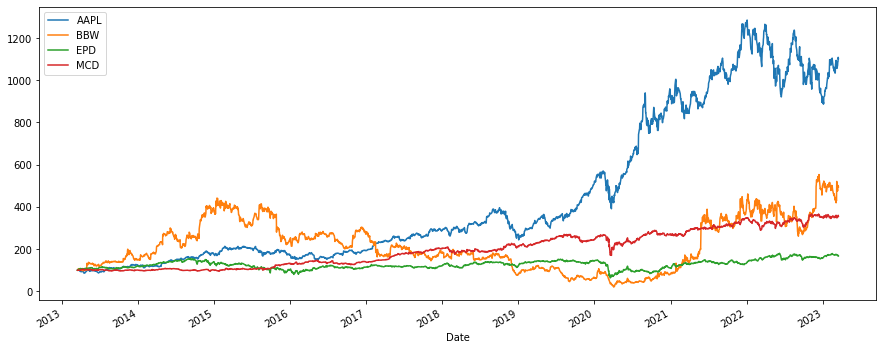

In [ ]:
(stocks_data / stocks_data.iloc[0] * 100).plot(figsize = (15,6))

In [ ]:
class Portfolio:
  def __init__(self, name, cash):
    self.expense_ratio = None
    self.cash = cash
    self.name = name
    self.us_stock_holdings = None
    self.expected_return = None
    self.portfolio_beta = None
    self.variance = None
    self.sharpe_ratio = None
  
  def add_us_stock(self, ticker, price, quantity):
    self.cash -= price * quantity
    
  def portfolio_report(self):
    print("PSU Quants {portfolio} Portfolio".format(portfolio = self.name))
    print("Assets Under Management: {aum}".format(aum = self.cash)) # add all assets later
    print("Cash on Hand: {cash}".format(cash = self.cash))
    print("Return as of {date}: {return_1}".format(date = "2020", return_1 = self.cash))

In [ ]:
test_portfolio = Portfolio('PSU Quant Portfolio', 1000000)

In [ ]:
test_portfolio.portfolio_report()

PSU Quants PSU Quant Portfolio Portfolio
Assets Under Management: 1000000
Cash on Hand: 1000000
Return as of 2020: 1000000
